In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
df = pd.read_csv("/content/winequality-red.csv") #Loading Dataset
df.sample(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1112,7.9,0.330,0.41,1.50,0.056,6.0,35.0,0.99396,3.29,0.71,11.0,6
1006,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
835,7.6,0.665,0.10,1.50,0.066,27.0,55.0,0.99655,3.39,0.51,9.3,5
1200,7.7,0.570,0.21,1.50,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6
751,8.3,0.650,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5
1027,6.4,0.795,0.00,2.20,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,5
276,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
1194,7.0,0.745,0.12,1.80,0.114,15.0,64.0,0.99588,3.22,0.59,9.5,6
1568,7.0,0.560,0.13,1.60,0.077,25.0,42.0,0.99629,3.34,0.59,9.2,5
23,8.5,0.490,0.11,2.30,0.084,9.0,67.0,0.99680,3.17,0.53,9.4,5


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
#finding null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


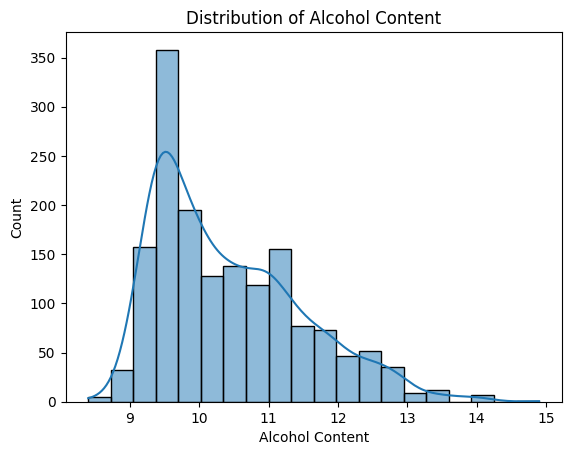

In [20]:
#no column contains categorical values so no need of encoding
sns.histplot(df['alcohol'], bins=20, kde=True)
plt.xlabel('Alcohol Content')
plt.ylabel('Count')
plt.title('Distribution of Alcohol Content')
plt.show()

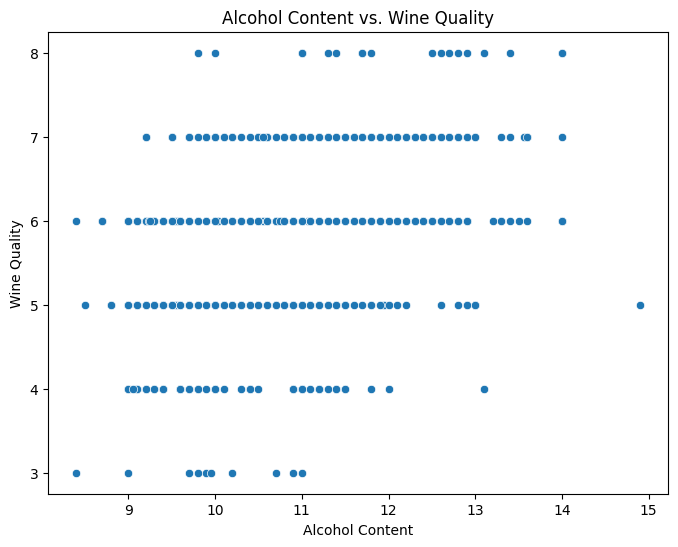

In [9]:
#bivariate analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.title('Alcohol Content vs. Wine Quality')
plt.show()

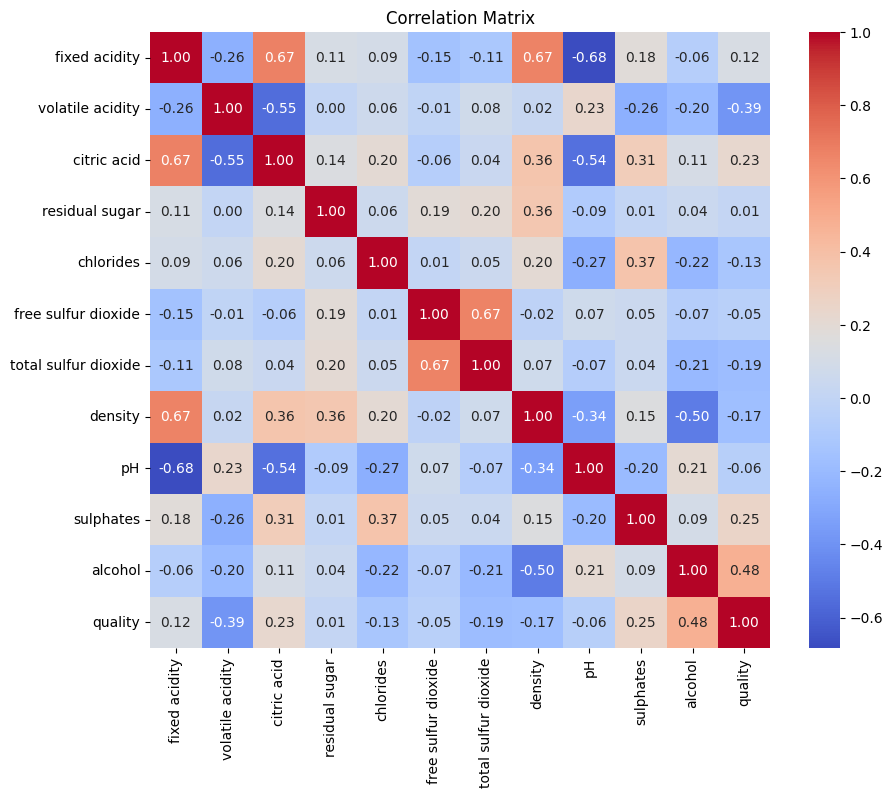

In [10]:
#Multivariate Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Multivariate Analysis
sns.pairplot(df, hue='quality')
plt.title('Pairplot of Features by Wine Quality')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [21]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [23]:
#considering the wine with quality 7 or above as good quality wine.
df['good_quality']=[1 if x>=7 else 0 for x in df['quality']]
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
1498,6.6,0.895,0.04,2.3,0.068,7.0,13.0,0.99582,3.53,0.58,10.8,6,0
159,6.8,0.600,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3,6,0
242,7.7,0.580,0.10,1.8,0.102,28.0,109.0,0.99565,3.08,0.49,9.8,6,0
1310,7.5,0.610,0.26,1.9,0.073,24.0,88.0,0.99612,3.30,0.53,9.8,5,0
314,7.4,0.360,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,5,0


In [24]:
#see total number of good vs bad quality wines
df['good_quality'].value_counts()

0    1382
1     217
Name: good_quality, dtype: int64

In [25]:
# Seperate dependent and independent variables
X = df.drop(['quality','good_quality'],axis=1)
Y = df['good_quality']

In [26]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [27]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: good_quality, Length: 1599, dtype: int64


## Model building, Training, Testing and Evaluation

In [29]:
#feature Importance
from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.07595335 0.10304631 0.09336799 0.07495908 0.06730316 0.06812071
 0.08463962 0.08532401 0.06576522 0.11238578 0.16913478]


In [30]:
#Splitting Dataset
x_train , x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
#evaluating testing accuracy
print("Accuracy Score : ",accuracy_score(y_test,y_pred))

Accuracy Score :  0.89375


In [35]:
#print training accuracy
print(accuracy_score(y_train,model.predict(x_train)))

1.0


In [40]:
print("Classification Report:")
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       417
           1       0.61      0.52      0.56        63

    accuracy                           0.89       480
   macro avg       0.77      0.74      0.75       480
weighted avg       0.89      0.89      0.89       480

